# Files

In [4]:
HMR_DIR=/data/hodges_lab/Tim/finalAnalyses_HMRs/HMRs_goodGenes/HMRs/
WORKING_DIR=/data/hodges_lab/Tim/paper_submission/data/cluster_lengths/
cd ${WORKING_DIR}

CL_FILE_DIR=/data/hodges_lab/Tim/paper_submission/data/cluster_lengths/input_files/
mkdir -p ${CL_FILE_DIR}

# Files
mv ${HMR_DIR}*_internalClusters_BED.txt ${CL_FILE_DIR}


In [8]:
cd ${CL_FILE_DIR}
ls

Adrenal_internalClusters_BED.txt  fSpinal_internalClusters_BED.txt
Bcell_internalClusters_BED.txt	  H1ESC_internalClusters_BED.txt
fHeart_internalClusters_BED.txt   Liver_internalClusters_BED.txt


## Clean files and add Length/ID column

In [11]:
head Adrenal_internalClusters_BED.txt

chr1	564500	570301
chr1	839737	856914
chr1	993521	1005100
chr1	1072225	1077128
chr1	1092587	1106080
chr1	1172539	1176674
chr1	1825860	1831061
chr1	2053317	2055828
chr1	2162085	2172003
chr1	2241779	2247030


In [15]:
cd ${CL_FILE_DIR}

for FILE in *BED.txt
do
    FILENAME="${FILE%%_internalClusters_BED.txt}"
    awk -v ID=$FILENAME 'BEGIN{OFS=FS="\t"}{print $1,$2,$3,($3-$2),ID}' ${FILE} > ${FILENAME}.ID.txt
done

In [ ]:
# Combine

In [23]:
COMB_DIR=/data/hodges_lab/Tim/paper_submission/data/cluster_lengths/combined/
mkdir -p $COMB_DIR

In [24]:
cd ${CL_FILE_DIR}
cat *.ID.txt > ${COMB_DIR}cluster_lengths_combined.txt

In [26]:
cd ${COMB_DIR}
head *.txt

chr1	564500	570301	5801	Adrenal
chr1	839737	856914	17177	Adrenal
chr1	993521	1005100	11579	Adrenal
chr1	1072225	1077128	4903	Adrenal
chr1	1092587	1106080	13493	Adrenal
chr1	1172539	1176674	4135	Adrenal
chr1	1825860	1831061	5201	Adrenal
chr1	2053317	2055828	2511	Adrenal
chr1	2162085	2172003	9918	Adrenal
chr1	2241779	2247030	5251	Adrenal


# R

In [1]:
library(ggplot2)
library(tidyverse)
library(data.table)

setwd("/data/hodges_lab/Tim/paper_submission/data/cluster_lengths/combined/")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
cll <- read_tsv("cluster_lengths_combined.txt", col_names = F)

Rows: 9343 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): X1, X5
dbl (3): X2, X3, X4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
colnames(cll) <- c("chr","start","end","length","celltype")

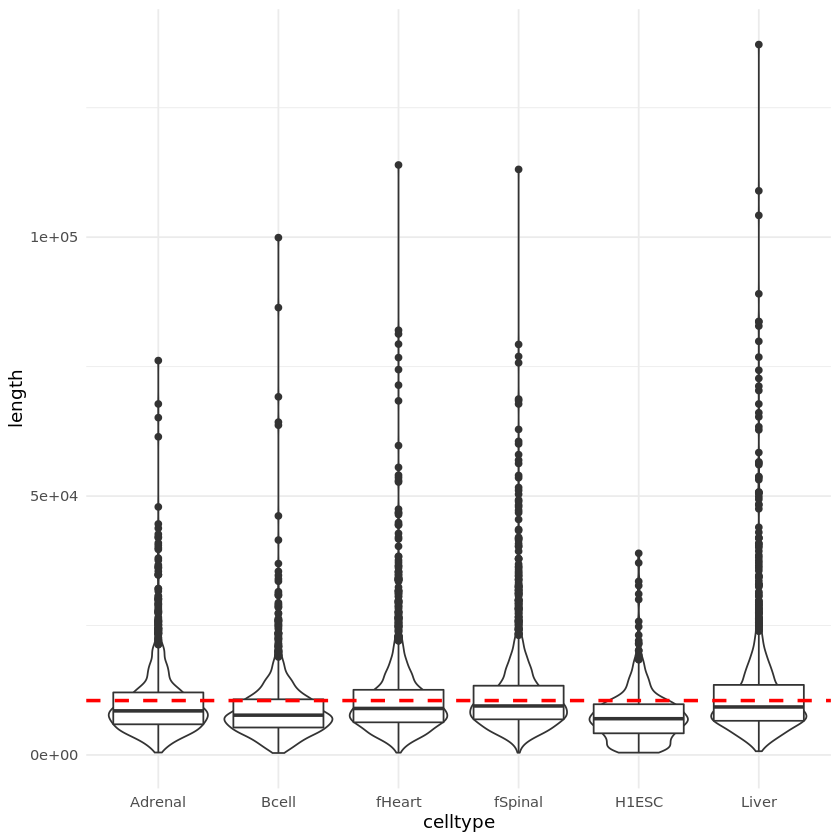

In [19]:
p_cll <- cll %>%
    ggplot(aes(x=celltype, y = length)) +
        geom_violin() +
        geom_boxplot() +
        theme_minimal() +
        geom_hline(yintercept = 10500, linetype='dashed', size = 1, color = 'red')
p_cll

In [8]:
cll %>%
    ggplot(aes(x=celltype, y = length)) +
        geom_boxplot() +
        theme_minimal() +
        geom_hline(yintercept = 10500)

In [7]:
getwd()

[1] "/gpfs52/data/hodges_lab/Tim/paper_submission/data/cluster_lengths/combined"

In [20]:
ggsave("/data/hodges_lab/Tim/paper_submission/data/cluster_lengths/s2_cluster_lengths.pdf", p_cll)

Saving 6.67 x 6.67 in image

